# Trabajo Pr√°ctico: Modelado Comparativo en Miner√≠a de Datos (Regresi√≥n)

En este trabajo vamos a analizar un dataset que contiene informaci√≥n sobre h√°bitos de estudiantes universitarios y su rendimiento acad√©mico.  
El objetivo de este notebook es aplicar t√©cnicas de miner√≠a de datos para construir un modelo de **regresi√≥n** que permita predecir una **variable continua** (el puntaje de examen) a partir del resto de los datos.

## Importaci√≥n de librerias

Antes de empezar, importamos todas las librer√≠as que vamos a necesitar para el an√°lisis, la visualizaci√≥n y el modelado.


In [1]:
# Manejo de datos
import pandas as pd          # para trabajar con datos en forma de tabla
import numpy as np           # para operaciones num√©ricas

# Visualizaci√≥n
import matplotlib.pyplot as plt   # para hacer gr√°ficos
import seaborn as sns             # para gr√°ficos m√°s completos

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder  # para preparar los datos
from sklearn.model_selection import train_test_split            # para dividir en train y test
from sklearn.decomposition import PCA                           # (opcional) reducci√≥n de dimensionalidad

# Modelos de Regresi√≥n
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# M√©tricas para evaluar modelos de Regresi√≥n
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Selecci√≥n de variables (opcional seg√∫n an√°lisis)
from sklearn.feature_selection import SelectKBest, f_regression

## Carga del dataset

Trabajamos con un archivo llamado `student_habits_performance.csv`, que contiene informaci√≥n sobre h√°bitos de estudiantes y su rendimiento acad√©mico.

In [2]:
from google.colab import files

uploaded = files.upload()

Saving student_habits_performance_2.csv to student_habits_performance_2.csv


In [3]:
# Cargamos el archivo CSV (separado por punto y coma)
df = pd.read_csv('student_habits_performance_2.csv')

# Mostramos las primeras filas
df.head()

student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

## Resumen general del dataset

En esta secci√≥n presentamos un resumen inicial para entender mejor la estructura y calidad del dataset:

In [4]:
# ========================
# 1. Dimensiones del dataset
# ========================
print("1. Dimensiones del dataset")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# ========================
# 2. Primeras filas del dataset
# ========================
print("2. Primeras filas del dataset")
display(df.head())
print("-" * 50)

# ========================
# 3. Informaci√≥n general del dataset
# ========================
print("3. Informaci√≥n general del dataset")
df.info()
print("-" * 50)

1. Dimensiones del dataset
Filas: 10000  |  Columnas: 16
--------------------------------------------------
2. Primeras filas del dataset


student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average   
1         Good                   6              High School          Average   
2         Poor                   1              High School             Poor   
3         Poor                   4                   Master             Good   
4         Fair                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

--------------------------------------------------
3. Informaci√≥n general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     10000 non-null  object 
 1   age                            10000 non-null  int64  
 2   gender                         10000 non-null  object 
 3   study_hours_per_day            10000 non-null  float64
 4   social_media_hours             10000 non-null  float64
 5   netflix_hours                  10000 non-null  float64
 6   part_time_job                  10000 non-null  object 
 7   attendance_percentage          10000 non-null  float64
 8   sleep_hours                    10000 non-null  float64
 9   diet_quality                   10000 non-null  object 
 10  exercise_frequency             10000 non-null  int64  
 11  parental_education_l

In [5]:
# ========================
# 4. Valores nulos por columna
# ========================
print("4. Valores nulos por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print("Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# ========================
# 5. Filas duplicadas
# ========================
print("5. Filas duplicadas")
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")
print("-" * 50)

# ========================
# 6. Categor√≠as √∫nicas por variable categ√≥rica
# ========================
print("6. Categor√≠as √∫nicas por cada variable categ√≥rica")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categor√≠as):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos por columna
Se encontraron columnas con valores nulos:


Valores nulos
parental_education_level            952

--------------------------------------------------
5. Filas duplicadas
Cantidad de filas duplicadas: 0
--------------------------------------------------
6. Categor√≠as √∫nicas por cada variable categ√≥rica

 student_id (1000 categor√≠as):
student_id
S1725    21
S1775    19
S1072    19
S1890    19
S1038    19
         ..
S1696     3
S1239     3
S1218     3
S1023     2
S1544     2
Name: count, Length: 1000, dtype: int64
------------------------------

 gender (3 categor√≠as):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categor√≠as):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categor√≠as):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (3 categor√≠as):
parental_education_level
High School    3929
Bachelor       3463
Master         1656
Name: count, 

A partir del an√°lisis exploratorio realizado, se obtienen las siguientes observaciones clave:

- **Cantidad de datos:** el dataset cuenta con 10,000 registros y 16 columnas, una cantidad adecuada para aplicar t√©cnicas de **regresi√≥n** de forma robusta.

- **Tipos de variables:** se identifican variables num√©ricas (`int64`, `float64`) como `age`, `study_hours_per_day`, `exam_score`, y variables categ√≥ricas (`object`) como `gender`, `diet_quality`, `internet_quality`, entre otras. Esta combinaci√≥n favorece el uso de diferentes tipos de modelos y t√©cnicas de preprocesamiento.

- **Primeras filas:** los datos iniciales presentan valores l√≥gicos y bien distribuidos, sin errores de carga visibles.

- **Valores nulos:** se detectaron 952 valores nulos en la variable `parental_education_level`, representando un 9.5% del total. Este porcentaje es manejable, y se optar√° por imputarlos con una categor√≠a adicional denominada `"No declarado"` para no eliminar datos ni introducir supuestos artificiales.

- **Filas duplicadas:** no se encontraron registros duplicados en el dataset (`0` filas duplicadas), lo que refleja una buena calidad estructural.

- **Formato general:** los nombres de las columnas son claros y coherentes con los datos que representan. No se identifican errores de formato ni estructuras inconsistentes.

- **Categor√≠as √∫nicas:** se revisaron todas las variables categ√≥ricas:
  - `student_id`: contiene 10000 valores √∫nicos (uno por estudiante), por lo tanto, no ser√° √∫til como predictor y ser√° eliminado.
  - Variables como `gender`, `part_time_job`, `diet_quality`, `internet_quality`, etc., tienen un n√∫mero reducido de categor√≠as y est√°n listas para ser codificadas posteriormente.

## Tratamiento Inicial de los Datos (Preprocesamiento B√°sico)

### a) Eliminaci√≥n de columna no informativa: `student_id`

La columna `student_id` contiene identificadores √∫nicos para cada estudiante y no aporta valor predictivo al modelo. Al tratarse de una variable sin relaci√≥n directa con el rendimiento acad√©mico, se procede a eliminarla del dataset.

In [6]:
df.drop(columns=["student_id"], inplace=True)

#### b) Imputaci√≥n de valores nulos

Se detectaron valores nulos en la variable `parental_education_level`, que representa el nivel educativo de los padres. Para evitar eliminar registros, se imputan estos valores con una nueva categor√≠a `"No declarado"`, dejando expl√≠cito que dicha informaci√≥n no fue proporcionada.

In [7]:
# Imputar valores nulos en parental_education_level
df["parental_education_level"] = df["parental_education_level"].fillna("No declarado")

### c) Definici√≥n de la variable objetivo

En este caso, no se aplicar√° ninguna transformaci√≥n a la variable exam_score, ya que se utilizar√° directamente como variable continua en el an√°lisis de regresi√≥n, a diferencia del enfoque de clasificaci√≥n donde fue convertida en categor√≠as.

## Dataset Preprocesado

In [8]:
# ========================
# Revisi√≥n del Dataset Preprocesado - Regresi√≥n
# ========================

# 1. Dimensiones del dataset actualizado
print("1. Dimensiones del dataset (post-tratamiento)")
print(f"Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
print("-" * 50)

# 2. Primeras filas
print("2. Primeras filas del dataset actualizado")
display(df.head())
print("-" * 50)

# 3. Informaci√≥n general
print("3. Tipos de datos y no-nulos")
df.info()
print("-" * 50)



1. Dimensiones del dataset (post-tratamiento)
Filas: 10000  |  Columnas: 15
--------------------------------------------------
2. Primeras filas del dataset actualizado


age  gender  study_hours_per_day  social_media_hours  netflix_hours  \
0   23  Female                  0.0                 1.2            1.1   
1   20  Female                  6.9                 2.8            2.3   
2   21    Male                  1.4                 3.1            1.3   
3   23  Female                  1.0                 3.9            1.0   
4   19  Female                  5.0                 4.4            0.5   

  part_time_job  attendance_percentage  sleep_hours diet_quality  \
0            No                   85.0          8.0         Fair   
1            No                   97.3          4.6         Good   
2            No                   94.8          8.0         Poor   
3            No                   71.0          9.2         Poor   
4            No                   90.9          4.9         Fair   

   exercise_frequency parental_education_level internet_quality  \
0                   6                   Master          Average   
1                   6              High School          Average   
2                   1              High School             Poor   
3                   4                   Master             Good   
4                   3                   Master             Good   

   mental_health_rating extracurricular_participation  exam_score  
0                     8                           Yes        56.2  
1                     8                            No       100.0  
2                     1                            No        34.3  
3                     1                           Yes        26.8  
4                     1                            No        66.4

--------------------------------------------------
3. Tipos de datos y no-nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  object 
 2   study_hours_per_day            10000 non-null  float64
 3   social_media_hours             10000 non-null  float64
 4   netflix_hours                  10000 non-null  float64
 5   part_time_job                  10000 non-null  object 
 6   attendance_percentage          10000 non-null  float64
 7   sleep_hours                    10000 non-null  float64
 8   diet_quality                   10000 non-null  object 
 9   exercise_frequency             10000 non-null  int64  
 10  parental_education_level       10000 non-null  object 
 11  internet_quality           

In [9]:
# 4. Verificar valores nulos
print("4. Valores nulos restantes por columna")
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
if not nulls.empty:
    print("No Se encontraron columnas con valores nulos:")
    display(pd.DataFrame(nulls, columns=["Valores nulos"]))
else:
    print("No se encontraron valores nulos.")
print("-" * 50)

# 5. Verificaci√≥n de la variable objetivo 'exam_score'
print("5. Verificaci√≥n de la variable objetivo 'exam_score'")
print(f"Tipo de dato: {df['exam_score'].dtype}")
print(f"Rango: min = {df['exam_score'].min()}, max = {df['exam_score'].max()}")
print("-" * 50)

# 6. Categor√≠as √∫nicas por cada variable categ√≥rica
print("6. Categor√≠as √∫nicas por variable categ√≥rica (actualizado)")
for col in df.select_dtypes(include="object").columns:
    print(f"\n {col} ({df[col].nunique()} categor√≠as):")
    print(df[col].value_counts())
    print("-" * 30)

4. Valores nulos restantes por columna
No se encontraron valores nulos.
--------------------------------------------------
5. Verificaci√≥n de la variable objetivo 'exam_score'
Tipo de dato: float64
Rango: min = 18.4, max = 100.0
--------------------------------------------------
6. Categor√≠as √∫nicas por variable categ√≥rica (actualizado)

 gender (3 categor√≠as):
gender
Male      4908
Female    4660
Other      432
Name: count, dtype: int64
------------------------------

 part_time_job (2 categor√≠as):
part_time_job
No     7832
Yes    2168
Name: count, dtype: int64
------------------------------

 diet_quality (3 categor√≠as):
diet_quality
Fair    4321
Good    3868
Poor    1811
Name: count, dtype: int64
------------------------------

 parental_education_level (4 categor√≠as):
parental_education_level
High School     3929
Bachelor        3463
Master          1656
No declarado     952
Name: count, dtype: int64
------------------------------

 internet_quality (3 categor√≠as):
interne

### Revisi√≥n del Dataset Preprocesado

Despu√©s de aplicar el preprocesamiento inicial, se realiz√≥ una nueva inspecci√≥n general del dataset con los siguientes resultados:

---

- **Dimensiones del dataset:**  
  El conjunto de datos contiene **10,000 registros** y **15 columnas**, luego de eliminar la columna `student_id`.

---

- **Tipos de datos y estructura:**  
  El dataset est√° completamente libre de valores nulos. Todas las columnas tienen el tipo de dato apropiado:
  - 6 columnas num√©ricas flotantes (`float64`)
  - 3 columnas num√©ricas enteras (`int64`)
  - 6 columnas categ√≥ricas (`object`)

---

- **Valores nulos restantes:**  
  **No se encontraron valores nulos** en ninguna columna despu√©s del tratamiento.

---

- **Variable objetivo `exam_score`:**  
  Esta variable continua ser√° utilizada como target en el an√°lisis de regresi√≥n. Se encuentra correctamente cargada y presenta un rango de valores entre **18.4** y **100.0**.

---

- **Revisi√≥n de variables categ√≥ricas:**  
  Se analiz√≥ la distribuci√≥n de valores en las variables categ√≥ricas m√°s importantes:

  - **`gender` (3 categor√≠as):**
    - `Male`: 4908 estudiantes
    - `Female`: 4660 estudiantes
    - `Other`: 432 estudiantes  
    > La categor√≠a `"Other"` representa estudiantes que no se identifican exclusivamente como masculino o femenino.

  - **`part_time_job` (2 categor√≠as):**
    - `No`: 7832 estudiantes (78.3%)
    - `Yes`: 2168 estudiantes (21.7%)  
    > Esta variable puede tener implicancias en la carga horaria y el rendimiento acad√©mico.

---

Estas verificaciones confirman que el dataset est√° en condiciones √≥ptimas para continuar con el an√°lisis exploratorio visual y la construcci√≥n de modelos de regresi√≥n.

## 1. Descripci√≥n del Problema

En este trabajo abordamos un problema de regresi√≥n utilizando un dataset que recopila informaci√≥n sobre estudiantes universitarios, incluyendo sus h√°bitos de estudio, estilo de vida y situaci√≥n personal. A partir de estos datos, se busca predecir el puntaje obtenido en el examen final (`exam_score`) mediante distintos modelos de regresi√≥n.

---

### Resumen del Dataset

El conjunto de datos contiene 10,000 registros y 15 columnas, incluyendo variables num√©ricas (como horas de estudio, sue√±o y asistencia) y categ√≥ricas (como g√©nero, calidad de dieta y participaci√≥n extracurricular).  
La variable objetivo `exam_score` es continua, con valores entre 18.4 y 100.

---

### Objetivo del An√°lisis

El objetivo de este trabajo es construir modelos de regresi√≥n que permitan predecir el valor continuo del puntaje de examen (`exam_score`) en funci√≥n de las dem√°s variables disponibles en el dataset. Esto permitir√° evaluar qu√© factores influyen m√°s fuertemente en el rendimiento acad√©mico de los estudiantes.

---

### Justificaci√≥n del Dataset

Este dataset es adecuado para aplicar t√©cnicas de regresi√≥n por varias razones:

- La variable objetivo es continua, lo que permite aplicar modelos como regresi√≥n lineal, √°rboles de decisi√≥n y random forest regressor.
- Contiene una mezcla rica de variables cuantitativas y cualitativas, lo que permite explorar relaciones complejas.
- No presenta valores nulos ni duplicados tras el tratamiento inicial, lo cual facilita el entrenamiento de modelos sin p√©rdida de informaci√≥n.
- Tiene un volumen de datos suficiente (10,000 instancias) para entrenar y validar modelos con confianza estad√≠stica.

---

Este an√°lisis se complementar√° m√°s adelante con la evaluaci√≥n comparativa entre distintos algoritmos de regresi√≥n, considerando m√©tricas como MAE, RMSE y R¬≤.

## 2. An√°lisis Exploratorio de Datos (EDA)

### 2.1 Estad√≠sticas descriptivas generales

Antes de avanzar con visualizaciones, analizamos las estad√≠sticas b√°sicas del dataset para comprender la escala y dispersi√≥n de los valores num√©ricos, as√≠ como la estructura general de los datos.

Se incluyen:
- Media, mediana, desviaci√≥n est√°ndar, m√≠nimo y m√°ximo.
- Conteo de valores √∫nicos por columna categ√≥rica.

In [10]:
# Estilo para resumen estad√≠stico de variables num√©ricas
df.describe().style\
    .set_caption("Estad√≠sticas Descriptivas de Variables Num√©ricas")\
    .background_gradient(cmap='Blues')\
    .format(precision=2)

 **An√°lisis**

El resumen estad√≠stico de las variables num√©ricas nos da una visi√≥n clara de la distribuci√≥n, escala y dispersi√≥n. Por ejemplo, el puntaje del examen (exam_score) tiene un promedio de 69.5 con una desviaci√≥n est√°ndar de 16.7, lo que indica una variabilidad considerable entre estudiantes.

### 2.2 Distribuci√≥n de la variable objetivo `exam_score`

Dado que el objetivo de este trabajo es predecir una variable continua (`exam_score`), se analiza su distribuci√≥n para identificar patrones, rangos predominantes, y posibles asimetr√≠as. Esto ayuda a determinar si se requiere transformaci√≥n o normalizaci√≥n m√°s adelante.

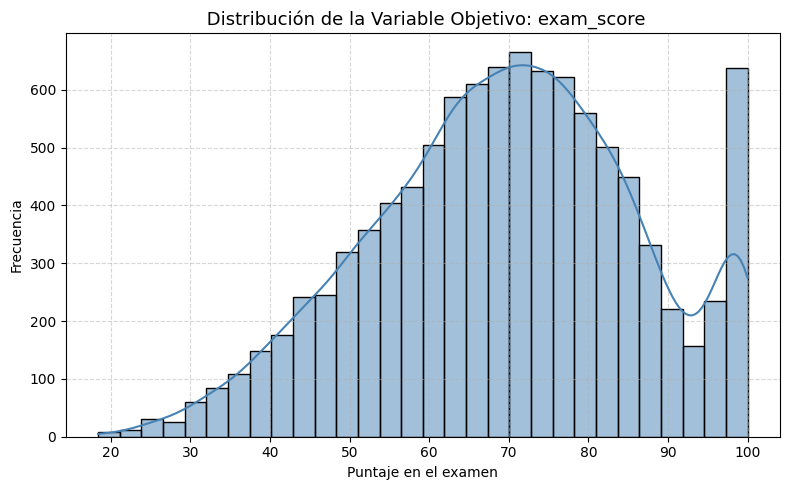

In [11]:
# Histograma con curva de densidad
plt.figure(figsize=(8, 5))
sns.histplot(df["exam_score"], bins=30, kde=True, color='steelblue')
plt.title(" Distribuci√≥n de la Variable Objetivo: exam_score", fontsize=13)
plt.xlabel("Puntaje en el examen")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Tabla resumen estilizada de la variable objetivo
df[["exam_score"]].describe().T.style\
    .set_caption(" Resumen Estad√≠stico de exam_score")\
    .background_gradient(cmap='Blues')\
    .format(precision=2)

 **An√°lisis**

Se utiliza un **histograma** porque la variable `exam_score` es **num√©rica y continua**, y esta visualizaci√≥n permite comprender c√≥mo se distribuyen los puntajes en el dataset.

La gr√°fica muestra:
- La **frecuencia** de estudiantes seg√∫n su puntaje en el examen.
- Una curva KDE (l√≠nea azul) que suaviza la distribuci√≥n y revela su forma general.
- La posibilidad de identificar **asimetr√≠as**, **concentraciones** de valores, o **outliers**.

Esta informaci√≥n es clave para evaluar si ser√° necesario aplicar alguna **transformaci√≥n**, como normalizaci√≥n o estandarizaci√≥n, antes de entrenar los modelos de regresi√≥n.

### 2.3 Visualizaci√≥n de distribuciones de variables (Regresi√≥n)

Se exploran las variables predictoras num√©ricas a trav√©s de histogramas con curva de densidad (KDE). Este an√°lisis visual permite observar posibles sesgos, simetr√≠as o rangos de valores extremos que podr√≠an afectar la calidad del modelo de regresi√≥n.

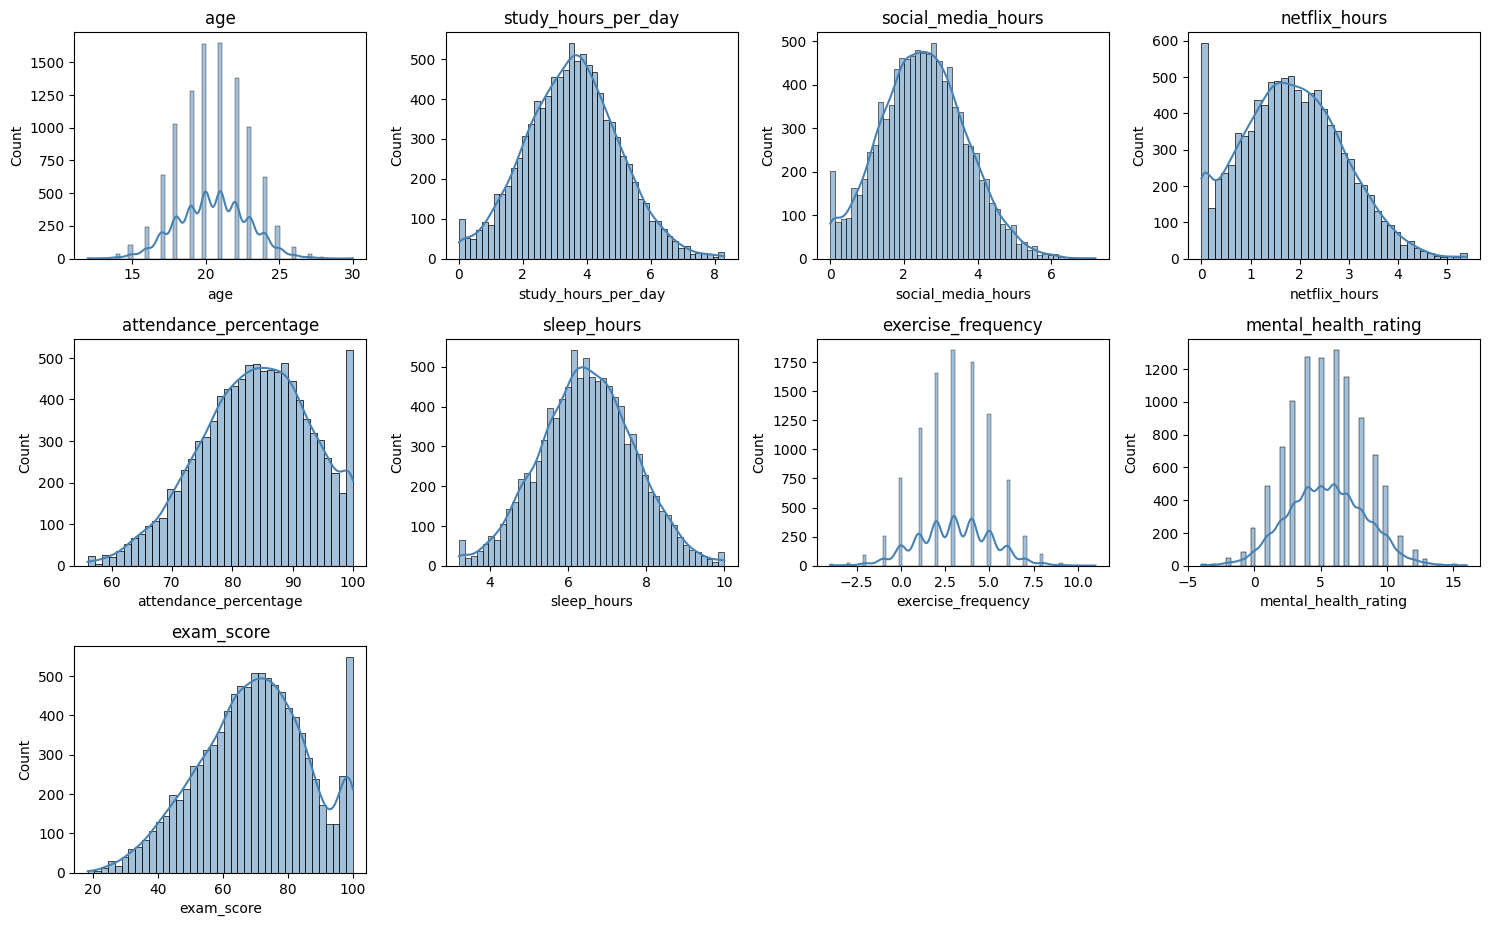

In [12]:
# Selecci√≥n de columnas num√©ricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Histograma para cada variable num√©rica
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color="steelblue")
    plt.title(col)
    plt.tight_layout()


  **An√°lisis de distribuciones**  
Las gr√°ficas muestran la distribuci√≥n de cada variable num√©rica. Se observan los siguientes patrones generales:

- **Distribuci√≥n normal/aproximada**: Variables como `age`, `sleep_hours`, `mental_health_rating` presentan distribuciones m√°s sim√©tricas.
- **Asimetr√≠a positiva o sesgo a la derecha**: Se observa en `study_hours_per_day`, `social_media_hours`, `netflix_hours`, lo cual sugiere que la mayor√≠a estudia/pasa tiempo en redes menos horas, con algunos valores extremos altos.
- **`exercise_frequency`** muestra una distribuci√≥n discreta con valores enteros. Puede necesitar normalizaci√≥n o ser tratada como ordinal.
- La variable **`exam_score`** presenta una distribuci√≥n ligeramente sesgada hacia la izquierda (asimetr√≠a negativa), con acumulaci√≥n de valores en torno a los 70-80 puntos, y un pico en 100 (posible efecto de truncamiento o redondeo superior).

Estas observaciones ser√°n √∫tiles para decidir si aplicar transformaciones, escalados o detecci√≥n de outliers antes del modelado.

### 2.4 Detecci√≥n de valores at√≠picos (Regresi√≥n)

Al trabajar con regresi√≥n, es importante detectar valores extremos en las variables predictoras ya que pueden afectar el ajuste del modelo y distorsionar los coeficientes, especialmente en modelos lineales.

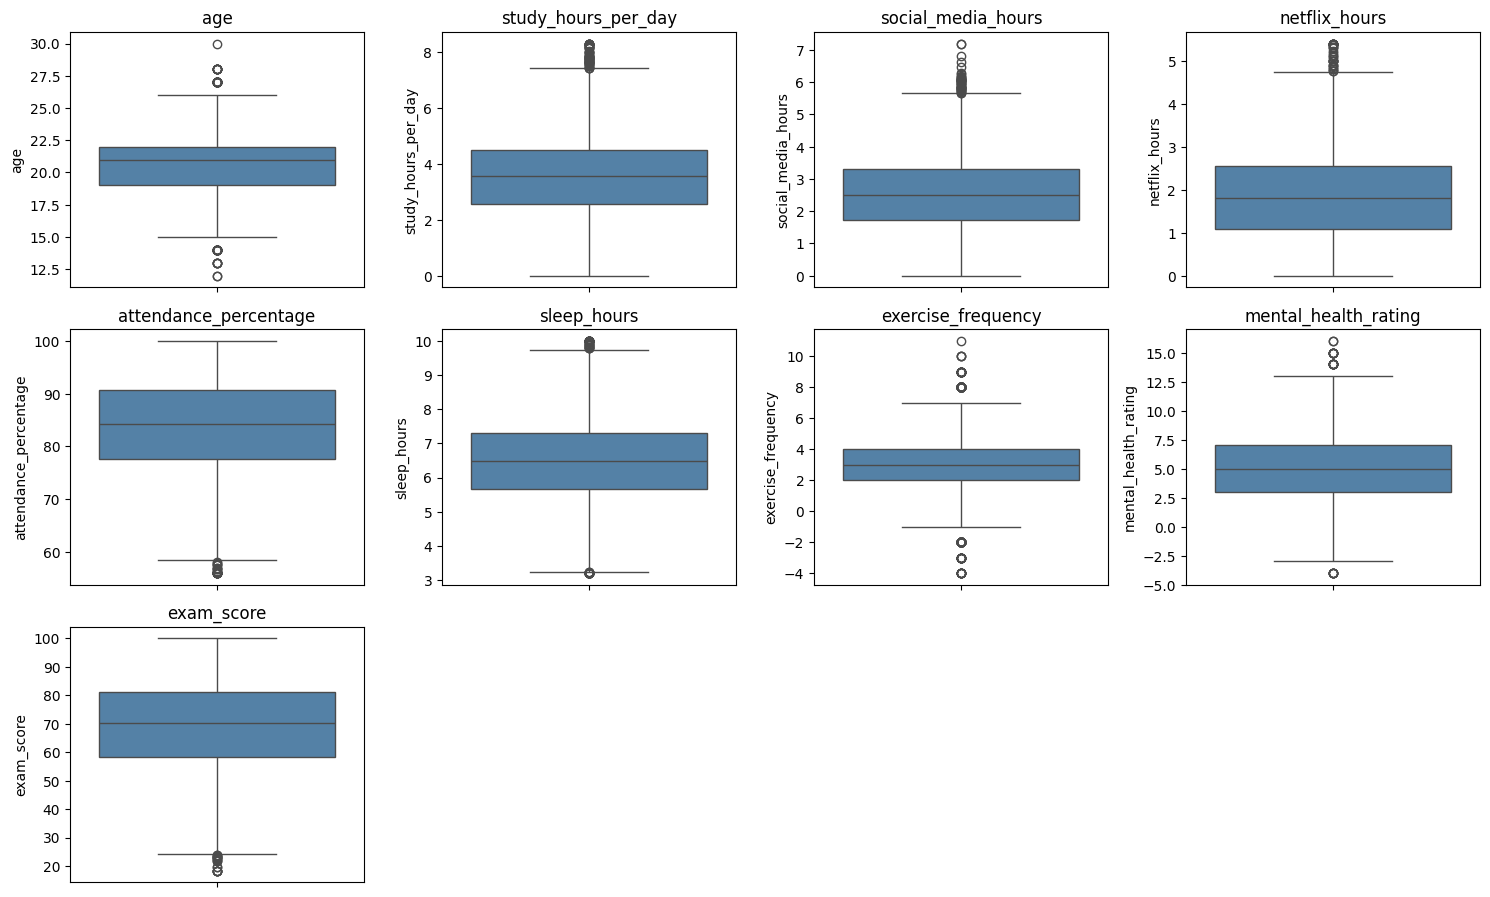

In [ ]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col, color="steelblue")
    plt.title(col)
    plt.tight_layout()

 **An√°lisis**

Los boxplots revelan lo siguiente:

Se observan valores at√≠picos (outliers) especialmente en:

exercise_frequency (valores negativos y por encima de 10)

social_media_hours y netflix_hours (valores altos)

mental_health_rating (valor m√≠nimo fuera del rango esperado)

Estas observaciones podr√≠an requerir tratamiento si afectan la sensibilidad del modelo de regresi√≥n.

El resto de las variables presentan una distribuci√≥n m√°s estable y centrada.

### 2.5 Correlaci√≥n entre variables (Regresi√≥n)

La matriz de correlaciones permite identificar qu√© variables num√©ricas est√°n m√°s fuertemente asociadas con `exam_score`, lo cual es clave para la selecci√≥n de atributos y mejora del modelo.

C:\Users\LORENA SIERRA\AppData\Local\Temp\ipykernel_12404\3709283762.py:6: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\LORENA SIERRA\OneDrive\Desktop\GITHUB\MODELIZADO\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


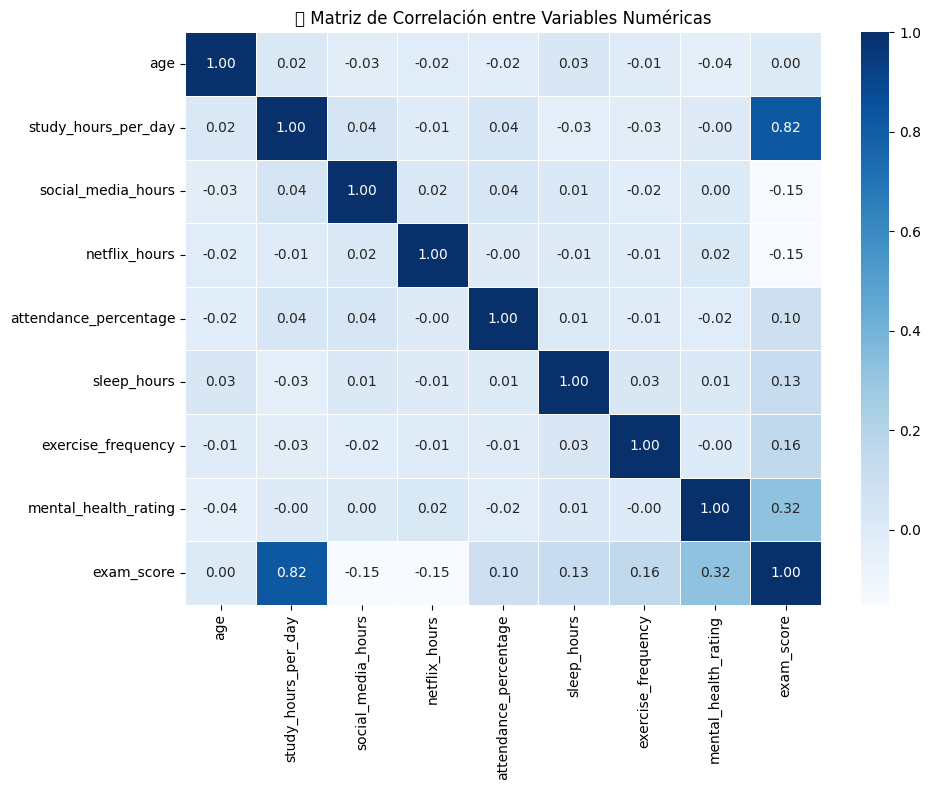

In [ ]:
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()

sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("üîó Matriz de Correlaci√≥n entre Variables Num√©ricas")
plt.tight_layout()
plt.show()

 **An√°lisis**

La variable objetivo exam_score tiene correlaci√≥n positiva m√°s fuerte con:

study_hours_per_day (r = 0.82)

mental_health_rating (r = 0.32)

Variables como social_media_hours y netflix_hours tienen una d√©bil correlaci√≥n negativa.

En general, la correlaci√≥n entre predictores es baja, lo que es bueno para evitar colinealidad.

### 2.6 Visualizaci√≥n de la Relaci√≥n entre Variables Predictoras y `exam_score`

Para examinar visualmente c√≥mo se relacionan las distintas variables num√©ricas con la variable objetivo `exam_score`, se construy√≥ una matriz de dispersi√≥n. Esta herramienta permite identificar patrones de asociaci√≥n, posibles relaciones lineales o no lineales, y detectar valores at√≠picos que puedan influir en el modelo de regresi√≥n.

En los gr√°ficos obtenidos se observan algunos comportamientos relevantes:

- **`study_hours_per_day`** muestra una clara relaci√≥n positiva con `exam_score`, indicando que a mayor tiempo de estudio, mayor rendimiento en los ex√°menes.
- **`mental_health_rating`** tambi√©n presenta una correlaci√≥n moderada con el rendimiento, lo cual podr√≠a reflejar el impacto del bienestar emocional en el desempe√±o acad√©mico.
- Variables como **`social_media_hours`** o **`netflix_hours`** muestran una tendencia inversa leve o muy dispersa, lo que sugiere que podr√≠an tener un efecto menor o m√°s complejo.

Estas observaciones son clave para la selecci√≥n de caracter√≠sticas relevantes en el modelo de regresi√≥n que se desarrollar√° m√°s adelante.

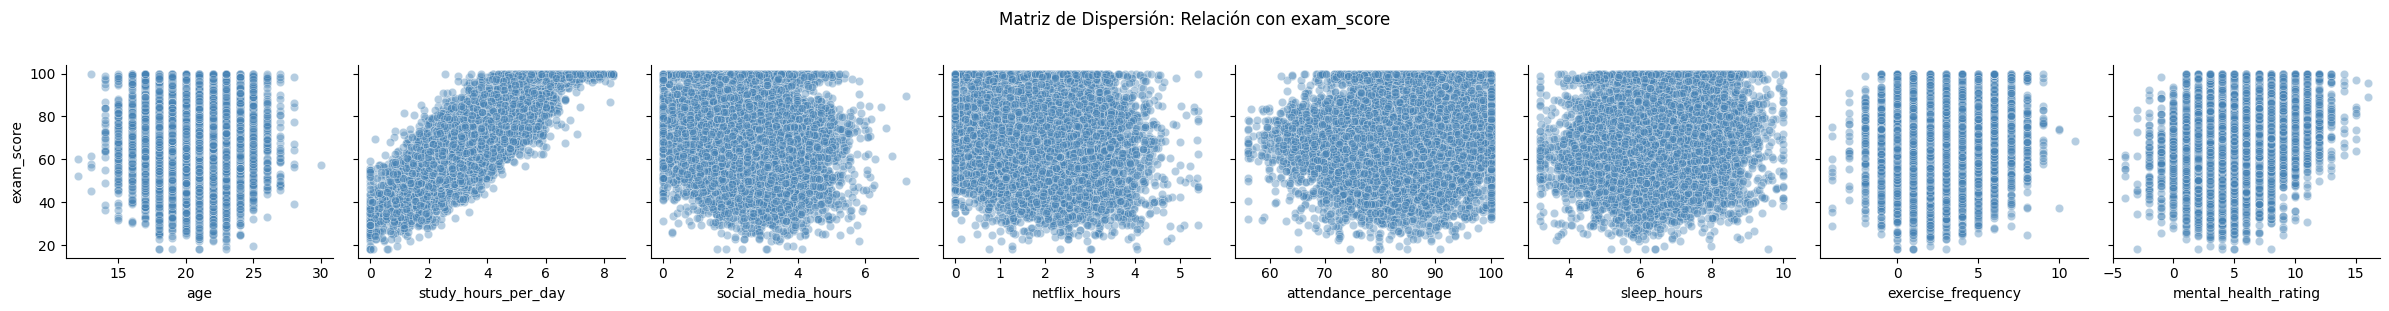

In [ ]:
# Selecci√≥n de variables num√©ricas
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
num_cols.remove("exam_score")  # exam_score se coloca como target en y

# Crear pairplot para examinar relaci√≥n con exam_score
sns.pairplot(df, x_vars=num_cols, y_vars=["exam_score"], height=3, aspect=1, kind="scatter",
             plot_kws={"alpha":0.4, "color":"steelblue"})
plt.suptitle("Matriz de Dispersi√≥n: Relaci√≥n con exam_score", y=1.02)
plt.tight_layout()
plt.show()

 **An√°lisis**

La visualizaci√≥n muestra la relaci√≥n entre las principales variables num√©ricas predictoras y la variable objetivo exam_score. A partir de esta matriz de dispersi√≥n pueden extraerse las siguientes observaciones:

study_hours_per_day es la variable con la asociaci√≥n m√°s clara y positiva: a mayor cantidad de horas de estudio diario, tienden a observarse puntajes m√°s altos en el examen. Esta relaci√≥n es visualmente fuerte y consistente, y ser√° clave para el modelo.

mental_health_rating tambi√©n evidencia una tendencia creciente. Los estudiantes que reportan mejor salud mental tienden a obtener mejores resultados, aunque con mayor dispersi√≥n en valores intermedios.

exercise_frequency muestra una relaci√≥n d√©bilmente positiva con exam_score. Si bien hay m√°s variabilidad, se observa que valores de rendimiento muy bajo son menos frecuentes en quienes reportan mayor frecuencia de ejercicio.

Variables como age, social_media_hours, netflix_hours, attendance_percentage y sleep_hours presentan una nube de puntos m√°s dispersa, sin una relaci√≥n clara o lineal. Podr√≠an aportar valor combinado en el modelo, pero no de forma aislada.

En resumen, este an√°lisis ayuda a confirmar la inclusi√≥n de study_hours_per_day, mental_health_rating y posiblemente exercise_frequency como variables relevantes para la predicci√≥n del rendimiento acad√©mico, mientras que otras podr√≠an requerir transformaci√≥n o ser consideradas en interacci√≥n con otras variables.

### Regresi√≥n ‚Äì 2.7 Limpieza y Calidad del Dataset

En el caso del dataset de regresi√≥n, tambi√©n se implementaron diversas acciones para asegurar su calidad:

- **Valores nulos:**  
  Los valores faltantes en `parental_education_level` fueron tratados mediante imputaci√≥n con la categor√≠a `"No declarado"`. La revisi√≥n posterior confirm√≥ la ausencia total de valores nulos.

- **Duplicados:**  
  Se corrobor√≥ que no existen filas duplicadas dentro del conjunto de datos.

- **Outliers:**  
  A trav√©s de los boxplots (secci√≥n 2.4), se observaron valores extremos en algunas variables num√©ricas. No obstante, al tratarse de datos posibles dentro del contexto educativo, se decidi√≥ conservarlos sin modificar.

- **Consistencia general:**  
  Los nombres de las columnas son claros, los tipos de datos son adecuados (`int`, `float`, `object`) y no se identificaron errores de carga ni estructuras inconsistentes.

> **Conclusi√≥n:** el dataset de regresi√≥n se encuentra en **condiciones √≥ptimas para continuar con la fase de modelado**.

## 3. Preprocesamiento de Datos

### 3.1 Divisi√≥n del dataset en entrenamiento y prueba

In [13]:
# Definimos X e y
X = df[["study_hours_per_day", "mental_health_rating", "social_media_hours"]]
y = df["exam_score"]   # aqu√≠ tu variable continua

# Divisi√≥n en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Visualizamos las dimensiones resultantes
print("Tama√±o del set de entrenamiento:", X_train.shape)
print("Tama√±o del set de prueba:      ", X_test.shape)


Tama√±o del set de entrenamiento: (7000, 3)
Tama√±o del set de prueba:       (3000, 3)


### 3.2 Transformaci√≥n de Datos

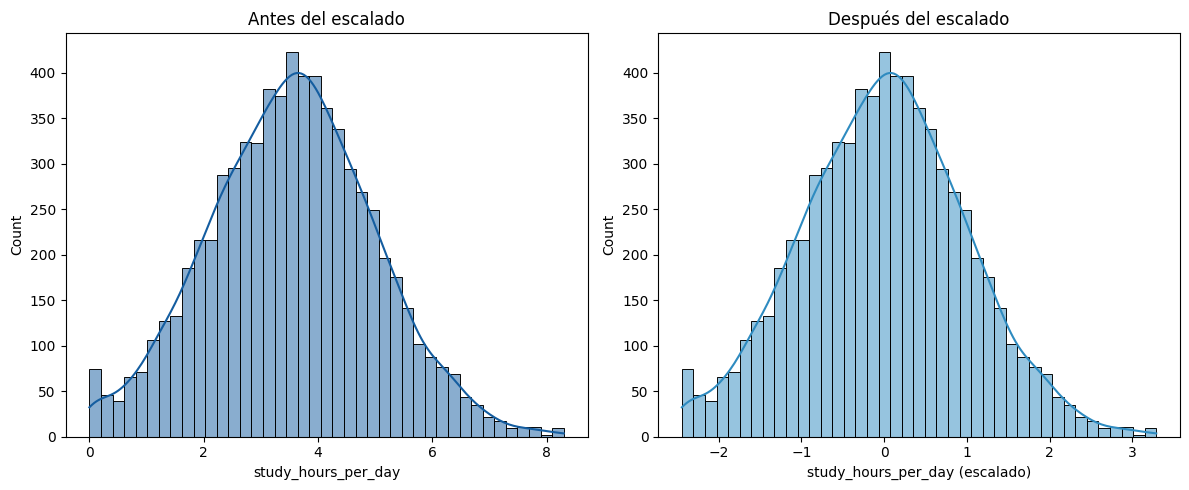

In [19]:
# Estandarizaci√≥n de variables num√©ricas
scaler = StandardScaler()

# Ajustar solo con X_train y luego transformar ambos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Visualizaci√≥n antes y despu√©s del escalado

# Colores de la paleta BuGn_r usados en clasificaci√≥n
color_antes   = '#145da0'  # Azul m√°s oscuro
color_despues = '#2e8bc0'  # Azul agua muy claro

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#   Histograma antes del escalado
sns.histplot(
    X_train["study_hours_per_day"],
    kde=True,
    ax=axes[0],
    color=color_antes,
    edgecolor="black"
)
axes[0].set_title("Antes del escalado")
axes[0].set_xlabel("study_hours_per_day")
axes[0].set_ylabel("Count")

#   Histograma despu√©s del escalado
study_idx = X_train.columns.get_loc("study_hours_per_day")
sns.histplot(
    X_train_scaled[:, study_idx],
    kde=True,
    ax=axes[1],
    color=color_despues,
    edgecolor="black"
)
axes[1].set_title("Despu√©s del escalado")
axes[1].set_xlabel("study_hours_per_day (escalado)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### 3.2 Entrenamiento de los modelos

In [20]:

# Instanciar modelos
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar
lr_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

## 4. Evaluaci√≥n y Comparaci√≥n de modelos

In [24]:
# REGRESI√ìN LINEAL
y_pred_lr = lr_model.predict(X_test_scaled)
print("Resultados para Regresi√≥n Lineal")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

# √ÅRBOL DE DECISI√ìN
y_pred_dt = dt_model.predict(X_test_scaled)
print("\nResultados para √Årbol de Decisi√≥n")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))

# RANDOM FOREST
y_pred_rf = rf_model.predict(X_test_scaled)
print("\nResultados para Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

# --------------------------------------------------------------
# TABLA COMPARATIVA ESTILIZADA (Colores seg√∫n rendimiento)
# --------------------------------------------------------------

# Crear DataFrame con resultados
resultados = pd.DataFrame({
    "Modelo": ["Regresi√≥n Lineal", "√Årbol de Decisi√≥n", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

# Colores ordenados seg√∫n rendimiento (m√°s oscuro = mejor modelo)
colores = ["#145da0", "#2e8bc0", "#B1D4E0"]  # oscuro, medio, claro

def color_filas(row):
    color = colores[row.name]
    return ['background-color: {}'.format(color)] * len(row)

# Mostrar tabla con estilo
resultados.style \
    .apply(color_filas, axis=1) \
    .format({"MAE": "{:.2f}", "RMSE": "{:.2f}", "R2": "{:.3f}"}) \
    .set_caption("Resumen Comparativo de Modelos de Regresi√≥n")



Resultados para Regresi√≥n Lineal
MAE: 5.783607397340517
RMSE: 7.238854948812883
R2: 0.8138652838914225

Resultados para √Årbol de Decisi√≥n
MAE: 8.242978333333333
RMSE: 10.389108504021571
R2: 0.6166069846740728

Resultados para Random Forest
MAE: 6.13647118079365
RMSE: 7.769334381459016
R2: 0.7855849532561496


### 4.1 Evaluaci√≥n con y sin PCA

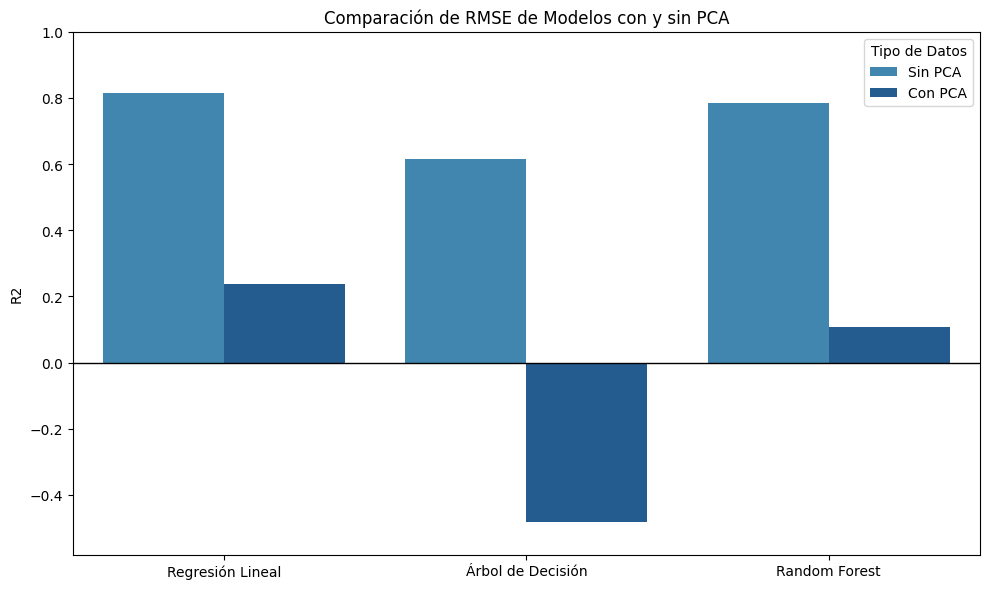

In [36]:

# Ajustar PCA (por ejemplo, 2 componentes)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

# Entrenar modelos sobre datos originales y sobre datos PCA
models = {
    'Regresi√≥n Lineal': LinearRegression(),
    '√Årbol de Decisi√≥n': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

resultados = []
for nombre, modelo in models.items():
    # entrenamiento y predicci√≥n sin PCA
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2   = r2_score(y_test, y_pred)
    resultados.append({'Modelo': nombre, 'Tipo': 'Sin PCA', 'RMSE': rmse, 'R2': r2})

    # entrenamiento y predicci√≥n con PCA
    modelo.fit(X_train_pca, y_train)
    y_pred_pca = modelo.predict(X_test_pca)
    rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
    r2_pca   = r2_score(y_test, y_pred_pca)
    resultados.append({'Modelo': nombre, 'Tipo': 'Con PCA', 'RMSE': rmse_pca, 'R2': r2_pca})

df_res = pd.DataFrame(resultados)

# Gr√°fico comparativo de R2
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_res,
    x='Modelo',
    y='R2',
    hue='Tipo',
    palette=['#2E8BC0', '#145DA0']  # azul claro vs azul oscuro para Sin PCA y Con PCA
)

# L√≠nea base en y=0
ax.axhline(0, color='black', linewidth=1)

# Opcional: ajustar los l√≠mites del eje para que se vea bien
ax.set_ylim(df_res['R2'].min() - 0.1, 1)

plt.title('Comparaci√≥n de RMSE de Modelos con y sin PCA')
plt.ylabel('R2')
plt.xlabel('')
plt.legend(title='Tipo de Datos')
plt.tight_layout()
plt.show()

# Tabla estilizada
resultado_estilo = df_res[['Modelo','Tipo','RMSE','R2']].copy()
display(
    resultado_estilo.style
        .set_caption("Rendimiento de los Modelos con y sin PCA")
        .format({'RMSE':'{:.2f}','R2':'{:.3f}'})
        .background_gradient(cmap='Blues', subset=['RMSE','R2'])
)


**Conclusi√≥n de la Comparaci√≥n de Modelos con y sin PCA**

- En todos los modelos, la versi√≥n con PCA mostr√≥ un **RMSE superior** y un **R¬≤ inferior** frente al uso del conjunto original de variables.  
- La gran ca√≠da de R¬≤ (incluso valores negativos) al aplicar PCA indica que, con solo tres features num√©ricas, la reducci√≥n de dimensi√≥n **empeora** la capacidad predictiva.  
- Por tanto, **no conviene** usar PCA en este caso: es mejor continuar el an√°lisis y despliegue con el conjunto completo de variables originales.


### 4.2 Validacion Cruzada

In [39]:
from sklearn.model_selection import cross_val_score

for name, model in [('LR', lr_model),
                    ('DT', dt_model),
                    ('RF', rf_model)]:
    scores = cross_val_score(
        model, X_train_scaled, y_train,
        cv=5, scoring='neg_root_mean_squared_error'
    )
    print(f"{name} CV RMSE: {(-scores).mean():.2f} ¬± {scores.std():.2f}")


LR CV RMSE: 7.16 ¬± 0.07
DT CV RMSE: 10.15 ¬± 0.09
RF CV RMSE: 7.64 ¬± 0.12


De estos resultados podemos concluir:

> **Regresi√≥n Lineal (LR)** obtiene el RMSE promedio m√°s bajo (~7.16) y adem√°s la desviaci√≥n est√°ndar es muy peque√±a (¬±0.07). Eso significa que, adem√°s de ser el modelo m√°s preciso, rinde de forma muy estable en distintos folds.

> **Random Forest (RF)** queda en segundo lugar: un RMSE medio de ~7.64 y algo m√°s de variabilidad entre folds (¬±0.12). Sigue estando bastante bien, pero no mejora a la LR ‚Äúout-of-the-box‚Äù.

> **√Årbol de Decisi√≥n (DT)** es claramente el peor aqu√≠: RMSE de ~10.15 y muy poca ganancia de estabilidad frente al resto.

**Conclusi√≥n general de la comparacion**

La Regresi√≥n Lineal es el mas preciso: tiene el RMSE m√°s bajo, el R¬≤ m√°s alto y la mayor estabilidad en CV. El Random Forest queda en segundo lugar, y el √Årbol de Decisi√≥n es el m√°s impreciso. Aplicar PCA empeor√≥ el rendimiento, as√≠ que seguiremos con las variables originales.